# Importing and working with data in python

Machine learning requires working with data. In order to work with data, we need to learn how to import and visualize it.

To get started we import some modules. The first two we are familiar with from the previous notebook.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

The next module we import is especially good for working with data.

In [3]:
import pandas as pd

Next, we'll upload our data to be attached to this notebook. Go to the left column where the paperclip is and click on it. There is a blue 'upload' button on the bottom right of the tab that should have opened – click on it, navigate to where you've downloaded your Admission_Predict file, and upload the data!

Now we import the data from the file 'Admission_Predict.csv' using pandas.

In [4]:
data = pd.read_csv('Admission_Predict.csv')

What does the data look like? Let's get a bit of a rundown:

In [5]:
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In your own words, describe what you think each of the data variables (columns) represents?

Answer: Serial number is just a placeholder for each student. GRE and TOEFL scores are scores for standardized exams, the Graduate Record Examinations and Test of English as a Foreign Language tests. University rating ranks the university the student attended, SOP ranks the student's 'statement of purpose,' LOR ranks the student's letters of recommendation, CGPA stands for cumulative GPA, Research is a binary variable (only two outcomes) indicating whether a student has performed undergraduate research or not, and chance of admission is the chance a student is accepted to graduate school given all the other factors.

How many rows and columns do we have? We can use the .shape command to find this out.

In [6]:
data.shape

(500, 9)

Plot one of the variables vs. another, on a scatter plot. What does this plot represent?

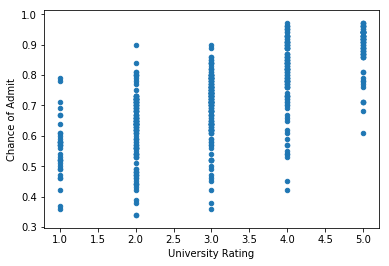

In [7]:
data.plot(kind='scatter', x='University Rating', y='Chance of Admit')    #data.plot tells me I want to plot features from my dataset called 'data'
        # kind = 'scatter' tells me to use a scatter plot (instead of a line, for example)
        # x = 'University Rating' says to plot the 'University Rating' column from my 'data' dataset on the x-axis
        # y = 'Chance of Admit' says to plot the 'Chance of Admit' column from my 'data' dataset on the y-axis

This plot represents the rating of the student's university against their chance of admission. We can look at more informative features below:

Create scatter plots below for 
1. GRE score vs. Chance of Admission
2. TOEFL score vs. Chance of Admission
3. LOR vs. Chance of Admission
4. CGPA vs. Chance of Admission
5. Anything else you can think of?

For each of the above examples, what do they tell you?

For each of these plots, we really just need to change the x input from our command above:

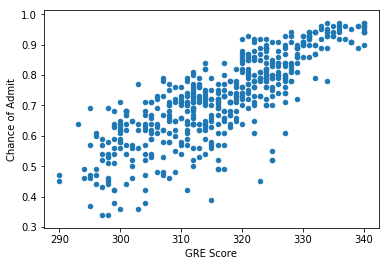

In [8]:
data.plot(kind='scatter', x='GRE Score', y='Chance of Admit')

Chance of admission appears highly correlated with the GRE score – as a person's GRE score goes up, their chance of admission does as well.

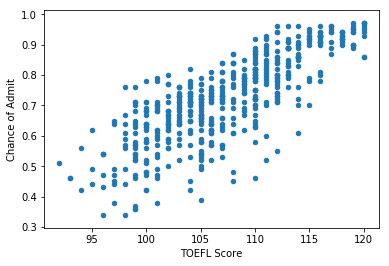

In [9]:
data.plot(kind='scatter', x='TOEFL Score', y='Chance of Admit')

TOEFL score also appears to have a positive effect on chance of admission, though it appears to be less strong of a relationship than GRE score.

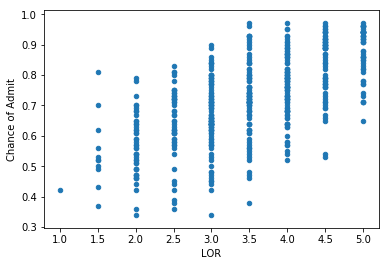

In [10]:
data.plot(kind='scatter', x='LOR', y='Chance of Admit')

This is the least clean relationship yet - there is a lot of variability, but letters of recommendation still appear to have some positive influence on chance of admission.

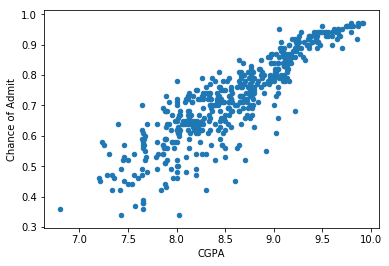

In [11]:
data.plot(kind='scatter', x='CGPA', y='Chance of Admit')

This is the cleanest relationship yet – the higher a person's cumulative GPAs is, the better their chance of admission to graduate school.

If we would like to use matplotlib directly, so that we have more control over the plot we could do so like this:

Text(0,0.5,'CGPA')

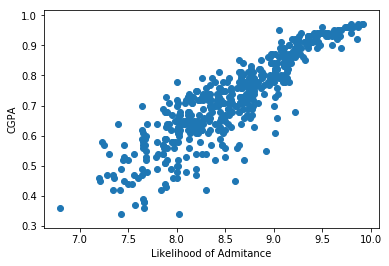

In [16]:
plt.scatter(data['CGPA'], data['Chance of Admit'])
plt.xlabel("Likelihood of Admitance")
plt.ylabel("CGPA")

If I wanted to color the dots by university ranking, how could I do that?

Text(0,0.5,'CGPA')

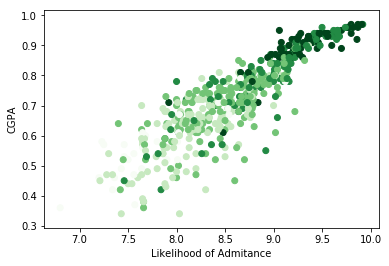

In [18]:
plt.scatter(data['CGPA'], data['Chance of Admit'], c=data['University Rating'], cmap='Greens')
plt.xlabel("Likelihood of Admitance")
plt.ylabel("CGPA")

## Other Types of Plots

Many different types of plots can be made using pandas and [matplotlib](https://matplotlib.org/stable/plot_types/index.html).

Let's take a look at two types of 2D histograms.

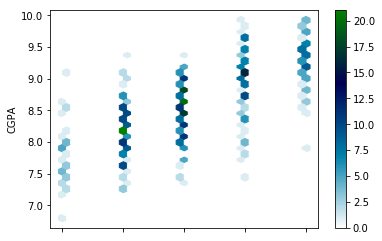

In [22]:
data.plot(kind='hexbin', x='University Rating', y='CGPA', gridsize=30, cmap='ocean_r')

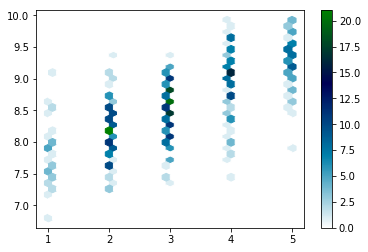

In [23]:
plt.hexbin(data['University Rating'], data['CGPA'], gridsize=30, cmap='ocean_r')
plt.colorbar() 

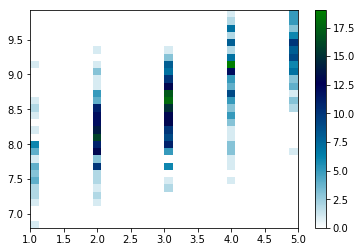

In [24]:
plt.hist2d(data['University Rating'], data['CGPA'], bins=(30,30), cmap='ocean_r')
plt.colorbar()

Now, what if we wanted to overlay some statistics on top of these? First we would need to do some statistical analysis, which could be stored in another dataframe.

Notice that this command returns a column of a dataframe:

In [26]:
data.groupby('University Rating').CGPA.std()

University Rating
1    0.476338
2    0.398619
3    0.406011
4    0.510288
5    0.381075
Name: CGPA, dtype: float64

We can initialize a new datafram and populate it with statistics from our initial dataframe.

In [55]:
# initialize new dataframe
CGPA_stats = pd.DataFrame()

# add some statistics
CGPA_stats['mean'] = data.groupby('University Rating').CGPA.mean()
CGPA_stats['median'] = data.groupby('University Rating').CGPA.median()
CGPA_stats['standard deviation'] = data.groupby('University Rating').CGPA.std()
CGPA_stats['skew'] = data.groupby('University Rating').CGPA.skew()
CGPA_stats['max'] = data.groupby('University Rating').CGPA.max()
CGPA_stats['min'] = data.groupby('University Rating').CGPA.min()

# use current columns to make more columns
CGPA_stats['SD1+'] = CGPA_stats['mean'] + CGPA_stats['standard deviation']
CGPA_stats['SD1-'] = CGPA_stats['mean'] - CGPA_stats['standard deviation']
CGPA_stats['SD2+'] = CGPA_stats['mean'] + 2*CGPA_stats['standard deviation']
CGPA_stats['SD2-'] = CGPA_stats['mean'] - 2*CGPA_stats['standard deviation']
CGPA_stats['SD3+'] = CGPA_stats['mean'] + 3*CGPA_stats['standard deviation']
CGPA_stats['SD3-'] = CGPA_stats['mean'] - 3*CGPA_stats['standard deviation']

CGPA_stats

,mean,median,standard deviation,skew,max,min,SD1+,SD1-,SD2+,SD2-,SD3+,SD3-
University Rating,,,,,,,,,,,,
1,7.798529,7.740,0.476338,0.644848,9.12,6.80,8.274867,7.322192,8.751205,6.845854,9.227543,6.369516
2,8.177778,8.170,0.398619,0.134965,9.36,7.21,8.576397,7.779158,8.975017,7.380539,9.373636,6.981920
3,8.500123,8.545,0.406011,-0.425115,9.32,7.40,8.906134,8.094113,9.312145,7.688102,9.718156,7.282091
4,8.936667,9.020,0.510288,-0.649898,9.92,7.46,9.446954,8.426379,9.957242,7.916091,10.467530,7.405803
5,9.278082,9.300,0.381075,-0.732928,9.91,7.92,9.659158,8.897007,10.040233,8.515931,10.421309,8.134856


We can plot this using the built in pandas function:

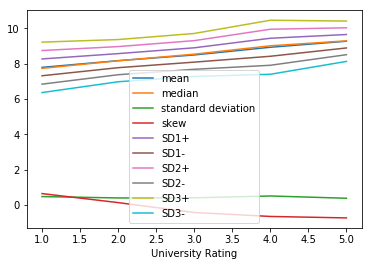

In [28]:
CGPA_stats.plot()

However, that doesn't look so great, so let's plot it using plt.

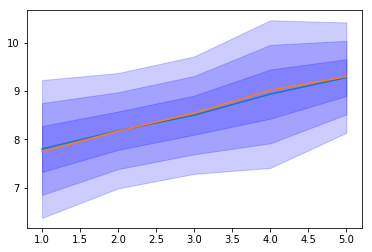

In [34]:
plt.fill_between(CGPA_stats.index, CGPA_stats['SD1+'], CGPA_stats['SD1-'], alpha=0.2, color='blue')
plt.fill_between(CGPA_stats.index, CGPA_stats['SD2+'], CGPA_stats['SD2-'], alpha=0.2, color='blue')
plt.fill_between(CGPA_stats.index, CGPA_stats['SD3+'], CGPA_stats['SD3-'], alpha=0.2, color='blue')

plt.plot(CGPA_stats['mean'])
plt.plot(CGPA_stats['median'])

How well does this predict the actual percentiles of our data?

$\mu-3\sigma$ should correspond to 0.13% or 0.0013

$\mu-2\sigma$ should correspond to 2.27% or 0.0227

$\mu-1\sigma$ should correspond to 15.86% or 0.1586

$\mu+1\sigma$ should correspond to 84.09% or 0.8409

$\mu+2\sigma$ should correspond to 97.68% or 0.9768

$\mu+3\sigma$ should correspond to 99.82% or 0.9982



![](https://miro.medium.com/max/1838/1*IdGgdrY_n_9_YfkaCh-dag.png)

In [48]:
CGPA_q3n = np.array(data.groupby('University Rating').CGPA.quantile(0.0214))
CGPA_q2n = np.array(data.groupby('University Rating').CGPA.quantile(0.1359))
CGPA_q1n = np.array(data.groupby('University Rating').CGPA.quantile(0.3413))
CGPA_q1p = np.array(data.groupby('University Rating').CGPA.quantile(0.8413))
CGPA_q2p = np.array(data.groupby('University Rating').CGPA.quantile(0.9763))
CGPA_q3p = np.array(data.groupby('University Rating').CGPA.quantile(0.9977))

Text(0,0.5,'CGPA')

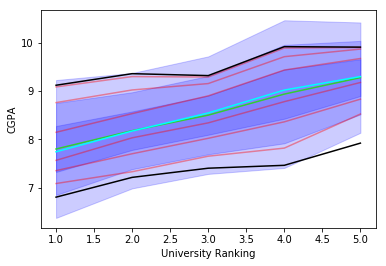

In [60]:
plt.fill_between(CGPA_stats.index, CGPA_stats['SD1+'], CGPA_stats['SD1-'], alpha=0.2, color='blue')
plt.fill_between(CGPA_stats.index, CGPA_stats['SD2+'], CGPA_stats['SD2-'], alpha=0.2, color='blue')
plt.fill_between(CGPA_stats.index, CGPA_stats['SD3+'], CGPA_stats['SD3-'], alpha=0.2, color='blue')

plt.plot(CGPA_stats.index, CGPA_q3n, alpha=0.4, color='red')
plt.plot(CGPA_stats.index, CGPA_q2n, alpha=0.4, color='red')
plt.plot(CGPA_stats.index, CGPA_q1n, alpha=0.4, color='red')
plt.plot(CGPA_stats.index, CGPA_q1p, alpha=0.4, color='red')
plt.plot(CGPA_stats.index, CGPA_q2p, alpha=0.4, color='red')
plt.plot(CGPA_stats.index, CGPA_q3p, alpha=0.4, color='red')

plt.plot(CGPA_stats['mean'], c='limegreen')
plt.plot(CGPA_stats['median'], c='cyan')

plt.plot(CGPA_stats['max'], c='k')
plt.plot(CGPA_stats['min'], c='k')

plt.xlabel('University Ranking')
plt.ylabel('CGPA')

Now, what if we wanted to plat the curve for one of these individual points? Let's say for a university ranking of 3?

In [98]:
ur_3 = data.loc[(data['University Rating'] == 3)]

<Container object of 3 artists>

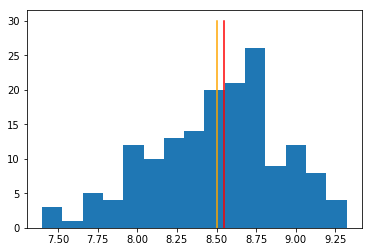

In [125]:
plt.hist(ur_3['CGPA'], bins=15)
plt.stem(np.array([CGPA_stats.at[CGPA_stats.index[2],'mean']]), np.array([30]), linefmt='orange', markerfmt='white')
plt.stem(np.array([CGPA_stats.at[CGPA_stats.index[2],'median']]), np.array([30]), linefmt='red', markerfmt='white')

In [ ]:
plt.plot(CGPA_stats['mean'])
plt.plot(CGPA_stats['median'])